In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
df = pd.read_csv(r'C:\Users\User\Documents\Assessment\Tetuan City power consumption.csv')

In [4]:
df.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [5]:
df.shape

(52416, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DateTime                   52416 non-null  object 
 1   Temperature                52416 non-null  float64
 2   Humidity                   52416 non-null  float64
 3   Wind Speed                 52416 non-null  float64
 4   general diffuse flows      52416 non-null  float64
 5   diffuse flows              52416 non-null  float64
 6   Zone 1 Power Consumption   52416 non-null  float64
 7   Zone 2  Power Consumption  52416 non-null  float64
 8   Zone 3  Power Consumption  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [7]:
df.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


In [8]:
df.columns

Index(['DateTime', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption'],
      dtype='object')

In [9]:
df.rename(
    columns=({ 'Wind Speed': 'wind_speed', 'general diffuse flows': 'general_diffuse_flows', 'diffuse flows': 'diffuse_flows', 'Zone 1 Power Consumption' : 'zone_1_pc', 'Zone 2  Power Consumption' : 'zone_2_pc', 'Zone 3  Power Consumption' : 'zone_3_pc'}), 
    inplace=True,
)
df.head()

,DateTime,Temperature,Humidity,wind_speed,general_diffuse_flows,diffuse_flows,zone_1_pc,zone_2_pc,zone_3_pc
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


<AxesSubplot:>

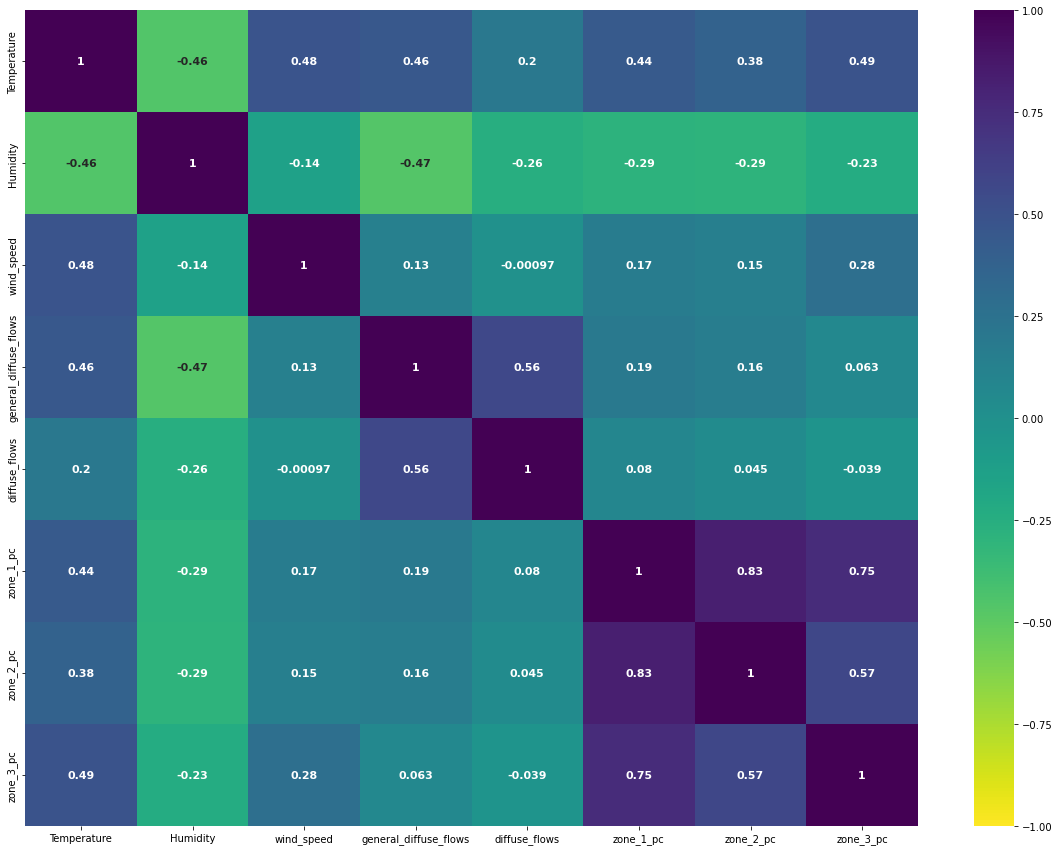

In [10]:
corr = df.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr, cmap='viridis_r', vmin=-1, vmax=1, annot=True, 
            annot_kws={'fontsize':11, 'fontweight':'bold'})

In [11]:
df.skew()

C:\Users\User\AppData\Local\Temp\ipykernel_15180\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Temperature              0.196719
Humidity                -0.625166
wind_speed               0.462423
general_diffuse_flows    1.306973
diffuse_flows            2.456907
zone_1_pc                0.228864
zone_2_pc                0.328876
zone_3_pc                1.023871
dtype: float64

In [12]:
df.kurtosis()

C:\Users\User\AppData\Local\Temp\ipykernel_15180\615572439.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurtosis()


Temperature             -0.303321
Humidity                -0.121860
wind_speed              -1.783169
general_diffuse_flows    0.402768
diffuse_flows            7.002902
zone_1_pc               -0.754054
zone_2_pc               -0.437397
zone_3_pc                1.086393
dtype: float64

In [13]:
df = df.set_index('DateTime')
df.index = pd.to_datetime(df.index)

In [14]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df
df = create_features(df)

<AxesSubplot:xlabel='Temperature'>

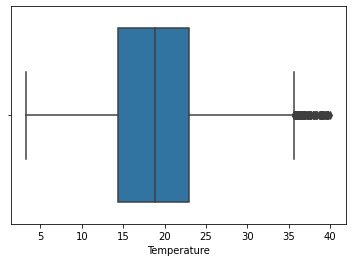

In [15]:
sns.boxplot(x=df['Temperature'])

In [16]:
Q1 = df.Temperature.quantile(0.25)
Q3 = df.Temperature.quantile(0.75)
Q1,Q3

(14.41, 22.89)

In [17]:
IQR = Q3 - Q1
IQR

8.48

In [18]:
lower_limit = Q1 - (1.5 * IQR)
upper_limit = Q3 + (1.5 * IQR)
lower_limit, upper_limit

(1.6899999999999995, 35.61)

In [19]:
df.Temperature.shape

(52416,)

In [20]:
df[(df['Temperature'] <= lower_limit) | (df['Temperature'] >= upper_limit)]

,Temperature,Humidity,wind_speed,general_diffuse_flows,diffuse_flows,zone_1_pc,zone_2_pc,zone_3_pc,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
DateTime,,,,,,,,,,,,,,,,
2017-07-07 12:00:00,35.78,27.88,4.921,841.0,94.4,29444.25249,30592.40506,27378.07531,12,4,3,7,2017,188,7,27
2017-07-07 12:10:00,36.21,26.75,4.923,850.0,94.7,32799.46844,27759.49367,25359.66527,12,4,3,7,2017,188,7,27
2017-07-07 12:20:00,36.37,26.71,4.922,855.0,95.3,36716.01329,25659.49367,25444.01674,12,4,3,7,2017,188,7,27
2017-07-07 12:30:00,36.69,26.52,4.920,860.0,95.7,36422.59136,25131.64557,25028.28452,12,4,3,7,2017,188,7,27
2017-07-07 12:40:00,36.59,31.89,4.925,862.0,96.2,36129.16944,24850.63291,25094.56067,12,4,3,7,2017,188,7,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-11 14:40:00,35.94,20.34,4.903,752.0,137.3,39380.24417,28492.08025,26404.51411,14,4,3,8,2017,223,11,32
2017-08-11 14:50:00,35.89,20.51,4.905,736.0,137.8,39277.95782,28503.48469,25814.67085,14,4,3,8,2017,223,11,32
2017-08-11 15:00:00,35.66,21.81,4.902,723.0,139.4,39220.42175,28237.38120,25796.61442,15,4,3,8,2017,223,11,32


In [21]:
df_temp_no_out = df[(df['Temperature']<=lower_limit)|(df['Temperature']>=upper_limit)].index
df.drop(df_temp_no_out , inplace=True)

In [22]:
df_temp_no_out.shape

(143,)

In [23]:
df.Temperature.shape

(52273,)

<AxesSubplot:xlabel='Temperature'>

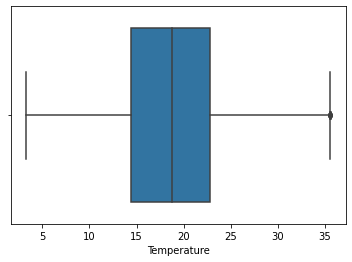

In [24]:
sns.boxplot(x=df['Temperature'])

<AxesSubplot:xlabel='Humidity'>

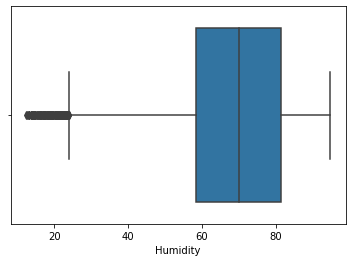

In [25]:
sns.boxplot(x=df['Humidity'])

In [26]:
Q1 = df.Humidity.quantile(0.25)
Q3 = df.Humidity.quantile(0.75)
Q1,Q3

(58.41, 81.4)

In [27]:
IQR = Q3 - Q1
IQR

22.99000000000001

In [28]:
lower_limit = Q1 - (1.5 * IQR)
upper_limit = Q3 + (1.5 * IQR)
lower_limit, upper_limit

(23.924999999999983, 115.88500000000002)

In [29]:
df.Humidity.shape

(52273,)

In [30]:
df[(df['Humidity'] <= lower_limit) | (df['Humidity'] >= upper_limit)]

,Temperature,Humidity,wind_speed,general_diffuse_flows,diffuse_flows,zone_1_pc,zone_2_pc,zone_3_pc,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
DateTime,,,,,,,,,,,,,,,,
2017-05-05 18:30:00,25.41,23.79,4.919,234.3,259.5,33489.83607,20901.54799,17221.70040,18,4,2,5,2017,125,5,18
2017-05-05 18:40:00,25.27,23.52,4.920,207.3,230.7,34169.70492,21299.07121,18037.89474,18,4,2,5,2017,125,5,18
2017-05-05 18:50:00,25.20,23.66,4.918,173.9,194.8,35013.24590,21904.64396,19151.41700,18,4,2,5,2017,125,5,18
2017-05-13 13:20:00,31.71,21.96,0.070,863.0,204.4,35693.11475,21562.84830,18720.00000,13,5,2,5,2017,133,13,19
2017-05-13 13:30:00,31.73,20.92,0.073,856.0,204.4,35680.52459,21510.83591,18807.44939,13,5,2,5,2017,133,13,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-22 16:40:00,31.06,14.80,4.934,407.7,88.0,34139.46903,19747.60915,13137.97753,16,4,3,9,2017,265,22,38
2017-09-22 16:50:00,30.84,19.21,4.929,369.3,87.3,33661.59292,19998.33680,13302.71706,16,4,3,9,2017,265,22,38
2017-09-22 17:00:00,30.44,20.21,4.945,347.0,94.2,33604.24779,19571.72557,13614.54545,17,4,3,9,2017,265,22,38


In [31]:
df_hum_no_out = df[(df['Humidity']<=lower_limit)|(df['Humidity']>=upper_limit)].index
df.drop(df_hum_no_out , inplace=True)

In [32]:
df_hum_no_out.shape

(199,)

In [33]:
df.Humidity.shape

(52074,)

<AxesSubplot:xlabel='Humidity'>

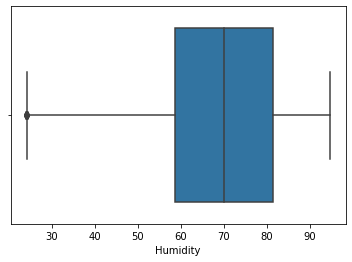

In [34]:
sns.boxplot(x=df['Humidity'])

<AxesSubplot:xlabel='wind_speed'>

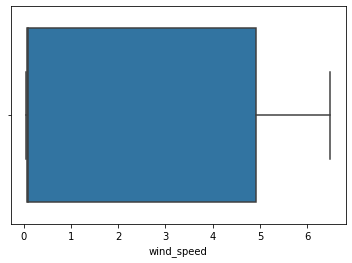

In [35]:
sns.boxplot(x=df['wind_speed'])

In [36]:
Q1 = df.wind_speed.quantile(0.25)
Q3 = df.wind_speed.quantile(0.75)
Q1,Q3

(0.078, 4.915)

In [37]:
IQR = Q3 - Q1
IQR

4.837

In [38]:
lower_limit = Q1 - (1.5 * IQR)
upper_limit = Q3 + (1.5 * IQR)
lower_limit, upper_limit

(-7.177499999999999, 12.1705)

In [39]:
df[(df['wind_speed'] <= lower_limit) | (df['wind_speed'] >= upper_limit)]

,Temperature,Humidity,wind_speed,general_diffuse_flows,diffuse_flows,zone_1_pc,zone_2_pc,zone_3_pc,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
DateTime,,,,,,,,,,,,,,,,


In [40]:
df_ws_no_out = df[(df['wind_speed']<=lower_limit)|(df['wind_speed']>=upper_limit)].index
df.drop(df_ws_no_out , inplace=True)

<AxesSubplot:xlabel='general_diffuse_flows'>

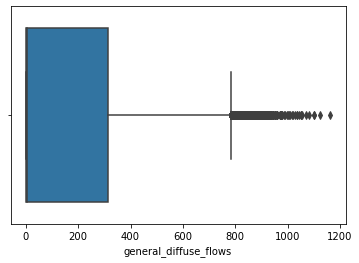

In [41]:
sns.boxplot(x=df['general_diffuse_flows'])

In [42]:
Q1 = df.general_diffuse_flows.quantile(0.25)
Q3 = df.general_diffuse_flows.quantile(0.75)
Q1,Q3

(0.062, 313.1)

In [43]:
IQR = Q3 - Q1
IQR

313.038

In [44]:
lower_limit = Q1 - (1.5 * IQR)
upper_limit = Q3 + (1.5 * IQR)
lower_limit, upper_limit

(-469.495, 782.657)

In [45]:
df.general_diffuse_flows.shape

(52074,)

In [46]:
df[(df['general_diffuse_flows'] <= lower_limit) | (df['general_diffuse_flows'] >= upper_limit)]

,Temperature,Humidity,wind_speed,general_diffuse_flows,diffuse_flows,zone_1_pc,zone_2_pc,zone_3_pc,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
DateTime,,,,,,,,,,,,,,,,
2017-02-14 12:30:00,16.68,53.06,0.082,803.0,269.8,33004.06780,21333.73860,16550.59296,12,1,1,2,2017,45,14,7
2017-02-21 13:00:00,15.92,55.29,0.083,810.0,851.0,37885.42373,22431.61094,17818.37186,13,1,1,2,2017,52,21,8
2017-02-21 13:10:00,15.86,53.22,0.084,877.0,933.0,38245.42373,22683.28267,17887.83920,13,1,1,2,2017,52,21,8
2017-02-21 13:20:00,15.92,53.16,0.079,845.0,897.0,38288.13559,22519.14894,17847.31658,13,1,1,2,2017,52,21,8
2017-02-21 13:30:00,16.25,53.52,0.082,818.0,855.0,38306.44068,22464.43769,17829.94975,13,1,1,2,2017,52,21,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-12 12:30:00,25.45,42.95,0.082,822.0,190.6,37824.42013,23713.69295,13632.58359,12,3,4,10,2017,285,12,41
2017-11-02 11:50:00,21.53,52.60,0.084,794.0,733.0,31440.00000,24318.59504,12572.53012,11,3,4,11,2017,306,2,44
2017-11-02 13:10:00,22.06,51.47,0.084,841.0,820.0,31680.00000,24753.71901,12774.93976,13,3,4,11,2017,306,2,44


In [47]:
df_gdf_no_out = df[(df['general_diffuse_flows']<=lower_limit)|(df['general_diffuse_flows']>=upper_limit)].index
df.drop(df_gdf_no_out , inplace=True)

In [48]:
df_gdf_no_out.shape

(2508,)

In [49]:
df.general_diffuse_flows.shape

(49566,)

<AxesSubplot:xlabel='general_diffuse_flows'>

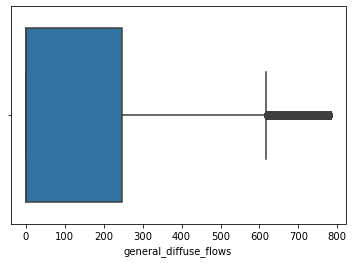

In [50]:
sns.boxplot(x=df['general_diffuse_flows'])

<AxesSubplot:xlabel='diffuse_flows'>

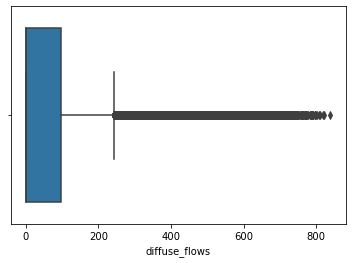

In [51]:
sns.boxplot(x=df['diffuse_flows'])

In [52]:
Q1 = df.diffuse_flows.quantile(0.25)
Q3 = df.diffuse_flows.quantile(0.75)
Q1,Q3

(0.119, 97.3)

In [53]:
IQR = Q3 - Q1
IQR

97.181

In [54]:
lower_limit = Q1 - (1.5 * IQR)
upper_limit = Q3 + (1.5 * IQR)
lower_limit, upper_limit

(-145.6525, 243.07150000000001)

In [55]:
df.diffuse_flows.shape

(49566,)

In [56]:
df[(df['diffuse_flows'] <= lower_limit) | (df['diffuse_flows'] >= upper_limit)]

,Temperature,Humidity,wind_speed,general_diffuse_flows,diffuse_flows,zone_1_pc,zone_2_pc,zone_3_pc,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
DateTime,,,,,,,,,,,,,,,,
2017-01-01 16:20:00,15.54,58.30,0.076,241.3,246.0,28556.96203,17325.22796,16192.771080,16,6,1,1,2017,1,1,52
2017-01-01 16:30:00,15.53,58.80,0.077,219.0,248.1,28514.43038,17456.53495,16343.132530,16,6,1,1,2017,1,1,52
2017-01-02 16:20:00,15.23,61.12,0.075,238.2,253.4,29480.50633,20611.55015,16181.204820,16,0,1,1,2017,2,2,1
2017-01-02 16:30:00,15.24,61.63,0.075,216.8,248.1,30161.01266,20545.89666,16314.216870,16,0,1,1,2017,2,2,1
2017-01-03 16:10:00,15.34,66.83,0.071,259.9,256.6,31874.43038,21045.59271,16458.795180,16,1,1,1,2017,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-14 12:40:00,15.09,63.14,0.076,539.1,283.7,31513.30798,25966.24732,10763.985590,12,3,4,12,2017,348,14,50
2017-12-15 15:00:00,16.69,59.35,0.081,478.0,288.4,30996.19772,25885.24087,9283.073229,15,4,4,12,2017,349,15,50
2017-12-20 16:40:00,17.09,69.66,0.073,235.5,252.8,32097.33840,26327.09420,9911.164466,16,2,4,12,2017,354,20,51


In [57]:
df_df_no_out = df[(df['diffuse_flows']<=lower_limit)|(df['diffuse_flows']>=upper_limit)].index
df.drop(df_df_no_out , inplace=True)

In [58]:
df_df_no_out.shape

(4619,)

In [59]:
df.diffuse_flows.shape

(44947,)

<AxesSubplot:xlabel='diffuse_flows'>

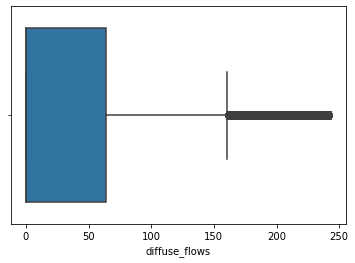

In [60]:
sns.boxplot(x=df['diffuse_flows'])

In [61]:
df.shape

(44947, 16)

In [62]:
df.describe()

,Temperature,Humidity,wind_speed,general_diffuse_flows,diffuse_flows,zone_1_pc,zone_2_pc,zone_3_pc,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
count,44947.000000,44947.000000,44947.000000,44947.000000,44947.000000,44947.000000,44947.000000,44947.000000,44947.000000,44947.000000,44947.000000,44947.000000,44947.0,44947.000000,44947.000000,44947.000000
mean,18.140406,70.155848,1.911447,115.028420,39.812293,32010.986712,20898.600504,17595.815550,11.243442,3.012793,2.561995,6.681314,2017.0,187.740561,15.691147,27.268249
std,5.539557,14.576014,2.336856,202.084403,61.920831,7459.266131,5387.140608,6752.522573,7.362221,2.001999,1.145628,3.553881,0.0,108.750483,8.773969,15.526240
min,3.247000,23.970000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070,0.000000,0.000000,1.000000,1.000000,2017.0,1.000000,1.000000,1.000000
25%,13.980000,60.390000,0.078000,0.059000,0.115000,25465.387540,16556.993410,12623.902060,5.000000,1.000000,1.000000,3.000000,2017.0,90.000000,8.000000,13.000000
50%,18.010000,71.800000,0.085000,0.099000,0.167000,31561.731410,20589.665650,16054.838710,10.000000,3.000000,3.000000,7.000000,2017.0,195.000000,16.000000,28.000000
75%,22.080000,82.800000,4.915000,144.650000,64.275000,37494.451405,24873.417720,21621.213485,18.000000,5.000000,4.000000,10.000000,2017.0,284.000000,23.000000,41.000000
max,35.580000,94.800000,6.483000,782.000000,242.900000,52204.395120,37408.860760,47598.326360,23.000000,6.000000,4.000000,12.000000,2017.0,364.000000,31.000000,52.000000


# Normalising Data

In [63]:
df['Temperature'].kurtosis()

-0.4601828911597572

In [64]:
df['Temperature'].skew()

0.14155167003408248

<AxesSubplot:xlabel='Temperature', ylabel='Count'>

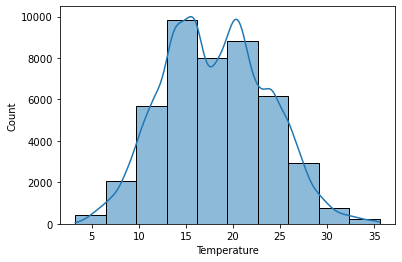

In [65]:
sns.histplot(df["Temperature"], kde=True, bins = 10)

In [66]:
df['Humidity'].kurtosis()

-0.3031855849240528

In [67]:
df['Humidity'].skew()

-0.5975838881635104

<AxesSubplot:xlabel='Humidity', ylabel='Count'>

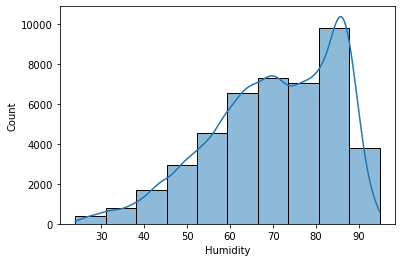

In [68]:
sns.histplot(df["Humidity"], kde=True, bins = 10)

In [69]:
# from scipy.stats import boxcox
# bcx_humidity, lambda_humidity = boxcox(df['Humidity'])

In [70]:
# fig, ax = plt.subplots(1, 2)

# sns.distplot(df["Humidity"], hist = False, kde = True,
#             kde_kws = {'shade': True, 'linewidth': 2},
#             label = "Non-Normal", color ="green", ax = ax[0])

# sns.distplot(bcx_humidity, hist = False, kde = True,
#             kde_kws = {'shade': True, 'linewidth': 2},
#             label = "After boxcox transformation", color ="green", ax = ax[1])

# # adding legends to the subplots
# plt.legend(loc = "upper right")
 
# # rescaling the subplots
# fig.set_figheight(5)
# fig.set_figwidth(10)
 
# print(f"Lambda value used for Transformation: {lambda_humidity}")

In [71]:
# sns.histplot(bcx_humidity, kde=True, bins = 10)

In [72]:
def qqplot(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

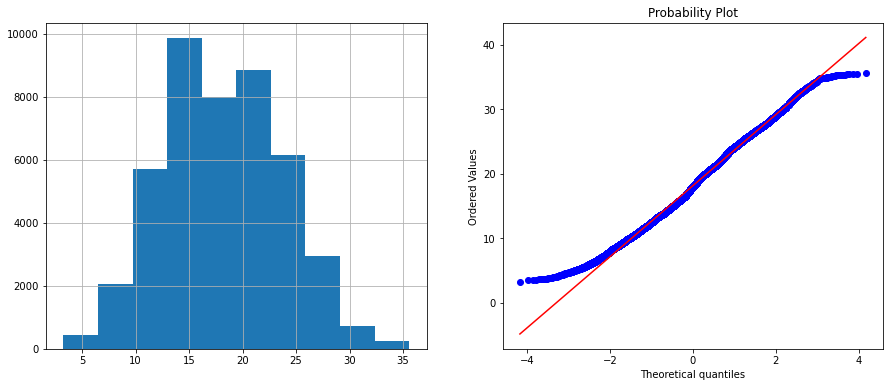

In [73]:
qqplot(df, 'Temperature')

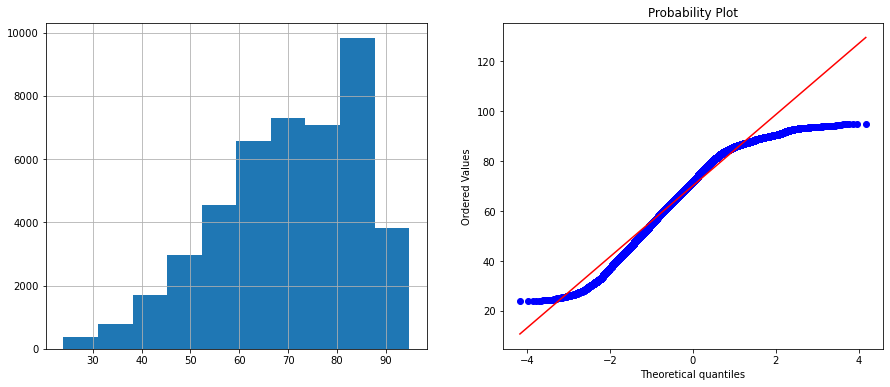

In [74]:
qqplot(df, 'Humidity')

                         sqrt           exp       log  reciprocal
DateTime                                                         
2017-01-01 00:00:00  8.590693  1.124431e+32  4.301359    0.013550
2017-01-01 00:10:00  8.631338  2.264326e+32  4.310799    0.013423
2017-01-01 00:20:00  8.631338  2.264326e+32  4.310799    0.013423
2017-01-01 00:30:00  8.660254  3.733242e+32  4.317488    0.013333
2017-01-01 00:40:00  8.700575  7.517826e+32  4.326778    0.013210
...                       ...           ...       ...         ...
2017-12-30 23:10:00  8.508819  2.772812e+31  4.282206    0.013812
2017-12-30 23:20:00  8.520563  3.386721e+31  4.284965    0.013774
2017-12-30 23:30:00  8.532292  4.136550e+31  4.287716    0.013736
2017-12-30 23:40:00  8.544004  5.052394e+31  4.290459    0.013699
2017-12-30 23:50:00  8.608136  1.517823e+32  4.305416    0.013495

[44947 rows x 4 columns]


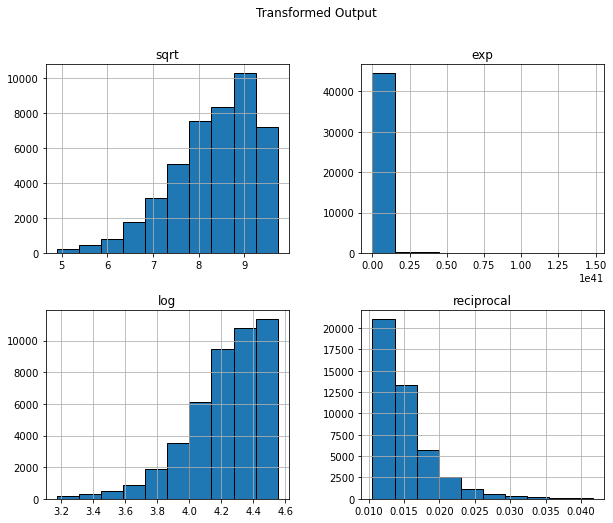

In [75]:
Humidity_tr = df['Humidity'].transform([np.sqrt, np.exp, np.log, np.reciprocal])
print(Humidity_tr)
Humidity_tr.hist(bins=10, layout=(2,2), edgecolor='k', figsize=(10,8))
plt.suptitle('Transformed Output')
plt.show()

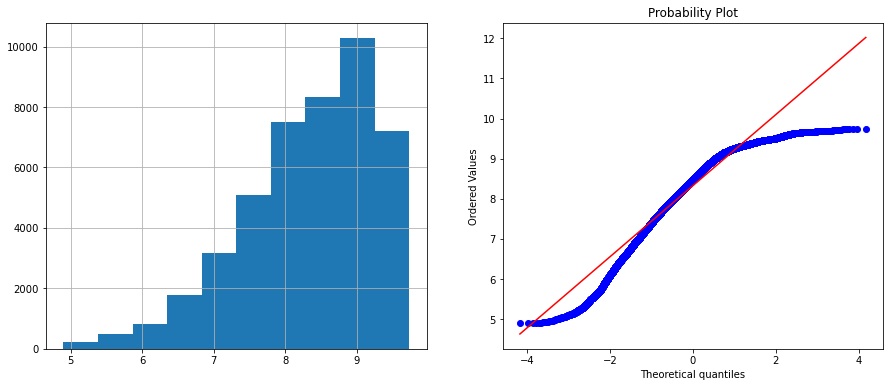

In [76]:
df['sqrt_hum']=np.sqrt(df['Humidity'])
qqplot(df,'sqrt_hum')

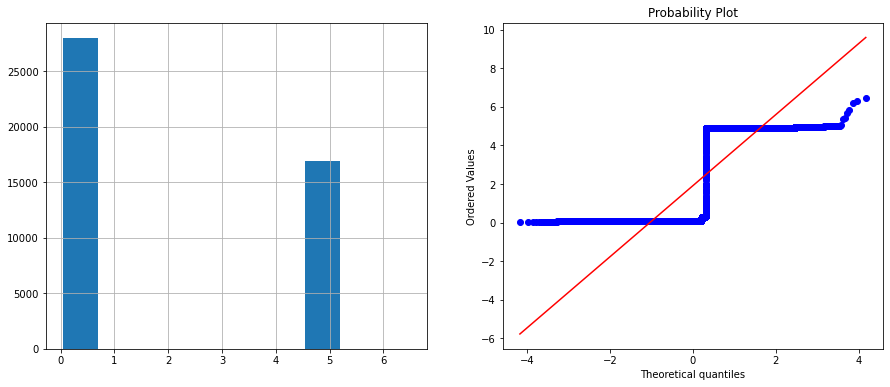

In [77]:
qqplot(df, 'wind_speed')

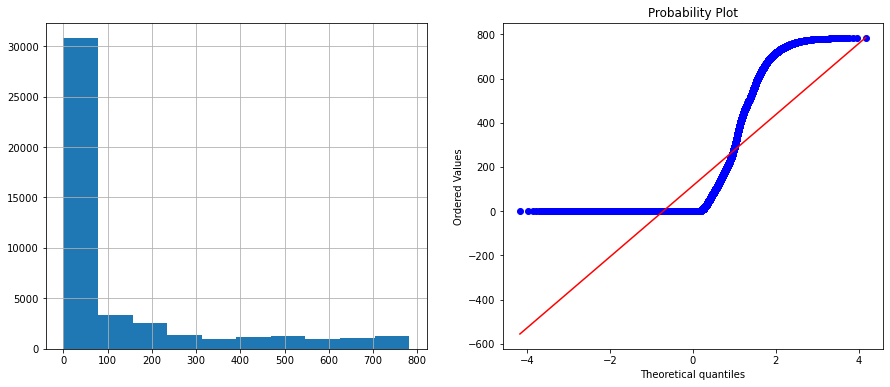

In [78]:
qqplot(df, 'general_diffuse_flows')

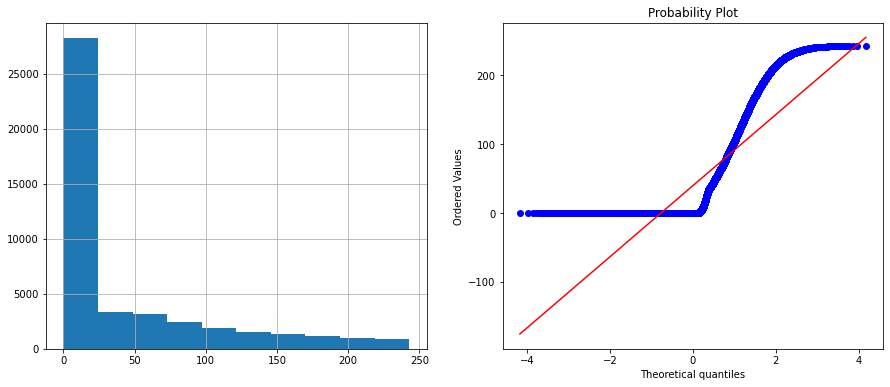

In [79]:
qqplot(df, 'diffuse_flows')